In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

## Minimum Variance Portfolio Backtest.

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.LAST_OPTIMAL.value(shrinkage_type="linear")

In [4]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [5]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [04:04<00:00,  1.16it/s]


StrategyStatistics:
* final_nav = 17.728727
* geom_avg_total_r = 0.163257
* geom_avg_xs_r = 0.143960
* std_xs_r = 0.152948
* min_xs_r = -0.076020
* max_xs_r = 0.107916
* skew = 0.121667
* kurtosis = 12.042854
* max_dd = -0.267603
* sharpe = 0.941234
* alpha_buy_hold = 0.073372
* tracking_error_buy_hold = 0.155379
* ir_buy_hold = 0.472210
* factor_loadings = {'low_risk': 0.491323551322482, 'momentum': -0.034114783412926286, 'quality': 0.08842548622421388, 'size': 0.067689369370514, 'value': -0.20490631773212867, 'spx': 0.6952567011888462}
* alpha_benchmark = 0.078098
* alpha_benchmark_pvalue = 0.001275
* tracking_error_benchmark = 0.100474
* ir_benchmark = 0.777294
* ttest_pval = 0.187742
* levene_pval = 0.000000
* timing_ability_coef = -0.026175
* timing_ability_pval = 0.139170

In [6]:
result.std_xs_r, result.sharpe

(0.15294781443468214, 0.9412343782039865)

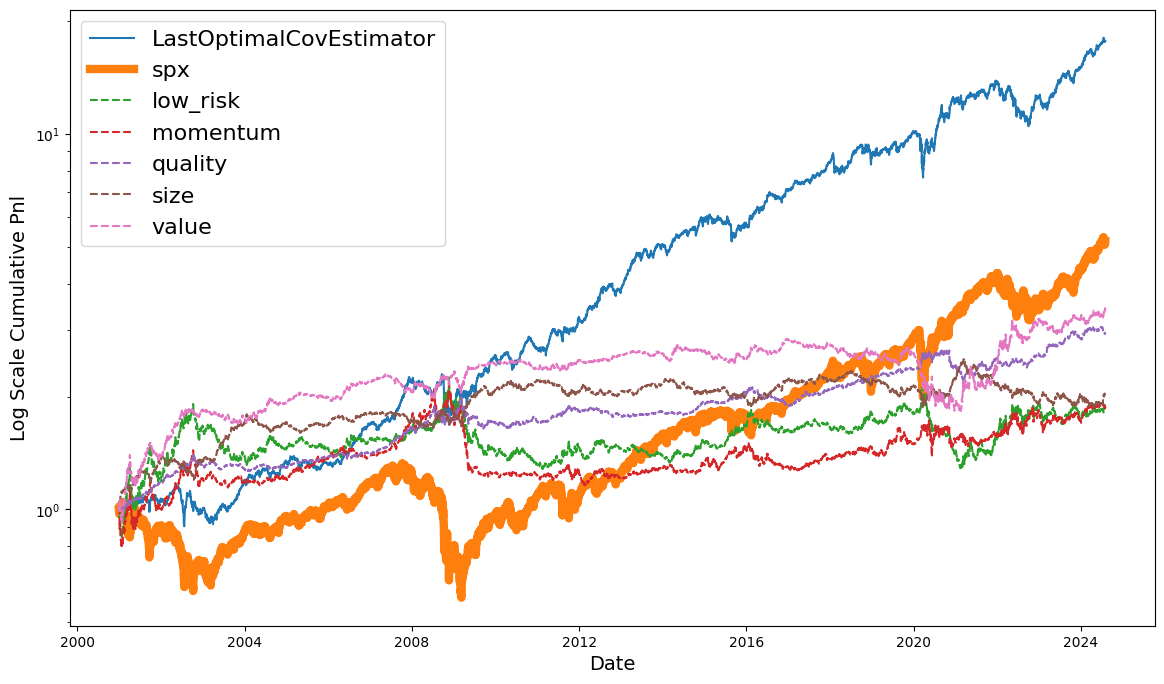

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

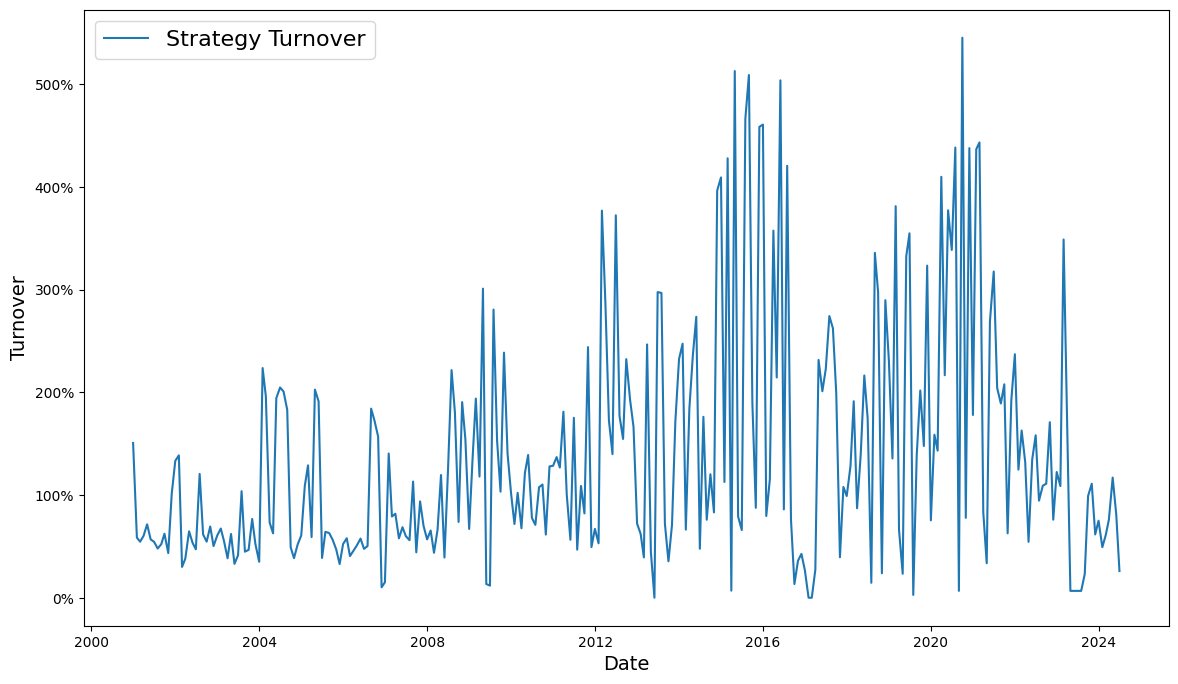

In [8]:
runner.plot_turnover()

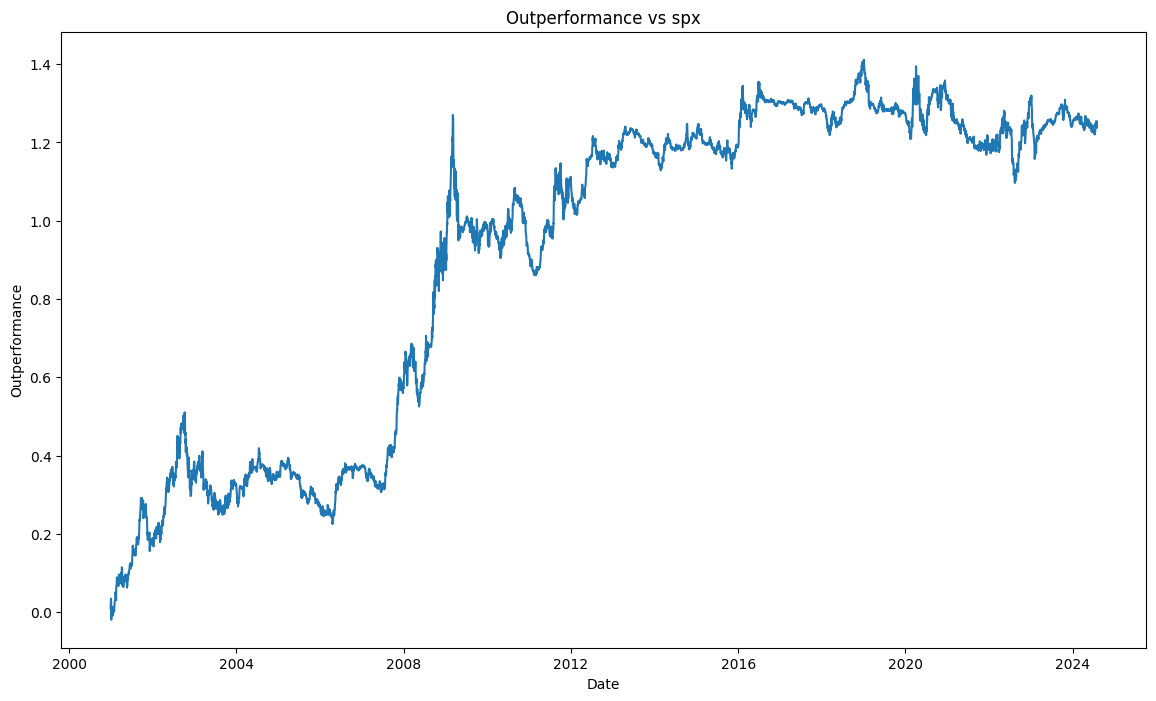

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")